In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import ipyparams
from helper_functions import propagate_deflected_muons_custom, get_angle_deviation, energy_name

<IPython.core.display.Javascript object>

In [3]:
save_plot = True # False

currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
assert currentNotebook != '', "no notebook name, run cell again"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [4]:
n_events = 1000 # 1
E_i = 1e9 # 1 PeV (corresponds to MeV)
E_f = 1e6 # 1 TeV (corresponds to MeV)
E_i_final = np.ones(n_events) * E_i
E_f_final = np.ones(n_events) * E_f

table_path="/Users/pascalgutjahr/.cache/PROPOSAL" # lehrstuhl macbook

hdf_name = 'df_{}_{}_{}events.hdf'.format(energy_name(E_i), energy_name(E_f), n_events)
hdf_name

'df_1PeV_1TeV_1000events.hdf'

# Propagation of default deflection parametrization

In [5]:
### run data
param_name = 'default'
deflection = ['tsaiapproximationbremsstrahlung', 
              'naivionization',
              'borogpetrukhinnuclearinteraction',
              'kelnerpairproduction']

tracks = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], 
                            track.track_directions()[0].spherical_coordinates[2], 
                            track.track_directions()[-1].spherical_coordinates[1], 
                            track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks] # in m
df.to_hdf(df_dir + hdf_name, key=param_name)    

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.75it/s]


In [6]:
### load data
param_name = 'default'
df_default = pd.read_hdf(df_dir + hdf_name, key=param_name)

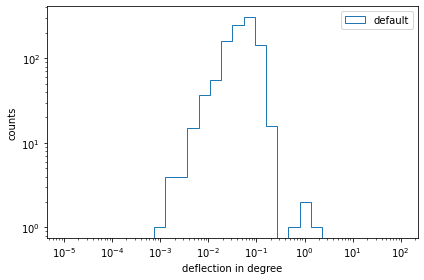

In [7]:
param_name = 'default'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Propagation of van Ginneken bremsstrahlung and nuclear interaction

In [8]:
### run data
param_name = 'brems_nuclint'
deflection = ['tsaiparametrizationbremsstrahlungginneken', 
              'naivionization',
              'bjorkennuclearinteraction',
              'kelnerpairproduction']

tracks_brems_nuclint = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks_brems_nuclint):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

    
### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks_brems_nuclint] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks_brems_nuclint] # in m
df.to_hdf(df_dir + hdf_name, key=param_name) 

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.88it/s]


In [9]:
### load data
param_name = 'brems_nuclint'
df_brems_nuclint = pd.read_hdf(df_dir + hdf_name, key=param_name)

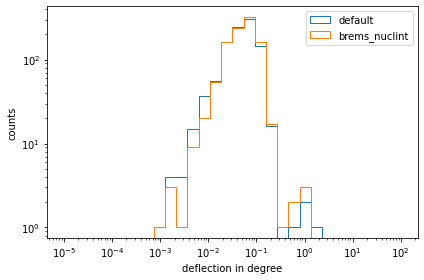

In [10]:
param_name = 'brems_nuclint'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_brems_nuclint['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Propagation of van Ginneken bremsstrahlung

In [11]:
### run data
param_name = 'brems'
deflection = ['tsaiparametrizationbremsstrahlungginneken', 
              'naivionization',
              'borogpetrukhinnuclearinteraction',
              'kelnerpairproduction']

tracks_brems = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks_brems):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

    
### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks_brems_nuclint] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks_brems_nuclint] # in m
df.to_hdf(df_dir + hdf_name, key=param_name) 

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.00it/s]


In [12]:
### load data
param_name = 'brems'
df_brems = pd.read_hdf(df_dir + hdf_name, key=param_name)

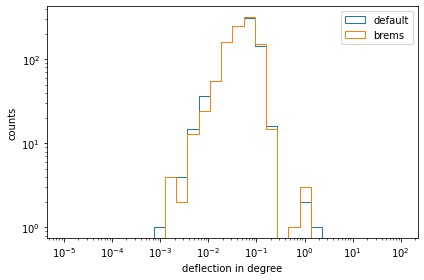

In [14]:
param_name = 'brems'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_brems['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Propagation of van Ginneken nuclear interaction

In [15]:
### run data
param_name = 'nuclint'
deflection = ['tsaiapproximationbremsstrahlung', 
              'naivionization',
              'bjorkennuclearinteraction',
              'kelnerpairproduction']

tracks_nuclint = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks_nuclint):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

    
### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks_brems_nuclint] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks_brems_nuclint] # in m
df.to_hdf(df_dir + hdf_name, key=param_name) 

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.34it/s]


In [16]:
### load data
param_name = 'nuclint'
df_nuclint = pd.read_hdf(df_dir + hdf_name, key=param_name)

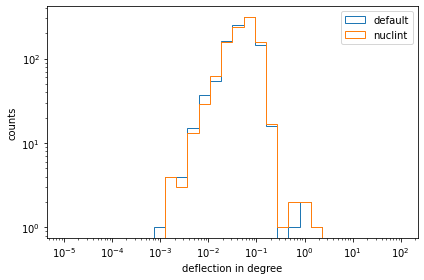

In [17]:
param_name = 'nuclint'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_nuclint['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Total comparison

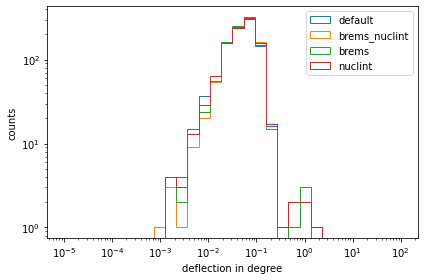

In [18]:
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_brems_nuclint['total_deflection'], bins=bins, histtype='step', label='brems_nuclint')
plt.hist(df_brems['total_deflection'], bins=bins, histtype='step', label='brems')
plt.hist(df_nuclint['total_deflection'], bins=bins, histtype='step', label='nuclint')
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_total_comparison.pdf'.format(n_events)) 